 #  **Dating App User Profiles' stats - Lovoo v3 - Group number 30**
 

<center><img src="https://github.com/gil261/project1/blob/main/lovoo_logo.jpg?raw=true" 
width="1000"></center>
 

 ## **Presenting by:**
 ### Roni Fahima ### 
 ### Gil Hatiel ###


<b id="Top"> </b>  

1. [Relevant libraries](#section1)
2. [dtypes & info](#section2)
3. [blabla](#section3)
4. [blabla](#section4)
5. [blabla](#section5)


Link to source : https://www.kaggle.com/datasets/jmmvutu/dating-app-lovoo-user-profiles/data?select=lovoo_v3_users_instances.csv


<a id='section1'> </a>
# $\text{Relevant libraries}$



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import re
from collections import Counter
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter
from wordcloud import STOPWORDS, WordCloud
#!pip install wordcloud

<a id='section2'> </a>
# $\text{dtypes & info}$

In [144]:
url = 'https://raw.githubusercontent.com/ronifahima/project-Roni-and-Gil/main/lovoo_v3_users_api-results%20(1).csv'
df_lovoo = pd.read_csv(url)
df_lovoo.head()

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN


### checking for duplicate uesers by userId

In [145]:
duplicate_userId_rows = df_lovoo[df_lovoo.duplicated(subset=['userId'], keep=False)]
duplicate_userId_rows

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile


### Information on the data

In [77]:
df_lovoo.shape

(3992, 42)

In [50]:
df_lovoo.isnull().sum().sort_values()

gender                       0
pictureId                    0
isNew                        0
isOnline                     0
isVip                        0
lang_count                   0
lang_fr                      0
lang_en                      0
lang_de                      0
lang_it                      0
lang_es                      0
lang_pt                      0
verified                     0
shareProfileEnabled          0
birthd                       0
userId                       0
isInfluencer                 0
isHighlighted                0
isMobile                     0
counts_pictures              0
name                         0
counts_details               0
isFlirtstar                  0
counts_profileVisits         0
counts_kisses                0
counts_g                     0
counts_fans                  0
flirtInterests_friends       0
flirtInterests_date          0
country                      0
genderLooking                0
flirtInterests_chat          0
age     

In [100]:
df_lovoo.columns

Index(['gender', 'genderLooking', 'age', 'name', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'counts_fans', 'counts_g', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country', 'city',
       'location', 'distance', 'isFlirtstar', 'isHighlighted', 'isInfluencer',
       'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 'lang_fr',
       'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd',
       'crypt', 'freetext', 'whazzup', 'userId', 'pictureId',
       'isSystemProfile'],
      dtype='object')

In [8]:
df_lovoo.dtypes

gender                     object
genderLooking              object
age                         int64
name                       object
counts_details            float64
counts_pictures             int64
counts_profileVisits        int64
counts_kisses               int64
counts_fans                 int64
counts_g                    int64
flirtInterests_chat          bool
flirtInterests_friends       bool
flirtInterests_date          bool
country                    object
city                       object
location                   object
distance                  float64
isFlirtstar                 int64
isHighlighted               int64
isInfluencer                int64
isMobile                    int64
isNew                       int64
isOnline                    int64
isVip                       int64
lang_count                  int64
lang_fr                      bool
lang_en                      bool
lang_de                      bool
lang_it                      bool
lang_es       

### Convert Boolean values to numeric values to perform correlation analysis

In [147]:
dict_mapping = {True: 1 , False: 0}
df_lovoo['flirtInterests_chat_numeric']= df_lovoo['flirtInterests_chat'].map(dict_mapping)
df_lovoo['flirtInterests_friends_numeric']= df_lovoo['flirtInterests_friends'].map(dict_mapping)
df_lovoo['flirtInterests_date_numeric']= df_lovoo['flirtInterests_date'].map(dict_mapping)
df_lovoo['lang_en_numeric']= df_lovoo['lang_en'].map(dict_mapping)
df_lovoo['lang_de_numeric']= df_lovoo['lang_de'].map(dict_mapping)
df_lovoo['lang_it_numeric']= df_lovoo['lang_it'].map(dict_mapping)
df_lovoo['lang_es_numeric']= df_lovoo['lang_es'].map(dict_mapping)
df_lovoo['lang_pt_numeric']= df_lovoo['lang_pt'].map(dict_mapping)
df_lovoo['lang_fr_numeric']= df_lovoo['lang_fr'].map(dict_mapping)
df_lovoo[['flirtInterests_chat_numeric', "flirtInterests_chat",  'flirtInterests_friends_numeric', 'flirtInterests_friends', 'flirtInterests_date_numeric','flirtInterests_date','lang_en_numeric','lang_en','lang_de_numeric','lang_de','lang_it_numeric','lang_it','lang_es_numeric','lang_es','lang_pt_numeric','lang_pt']]

,flirtInterests_chat_numeric,flirtInterests_chat,flirtInterests_friends_numeric,flirtInterests_friends,flirtInterests_date_numeric,flirtInterests_date,lang_en_numeric,lang_en,lang_de_numeric,lang_de,lang_it_numeric,lang_it,lang_es_numeric,lang_es,lang_pt_numeric,lang_pt
0,1,True,1,True,1,True,0,False,1,True,0,False,0,False,0,False
1,1,True,1,True,1,True,0,False,1,True,1,True,0,False,0,False
2,0,False,0,False,1,True,0,False,0,False,0,False,0,False,0,False
3,1,True,1,True,0,False,1,True,0,False,0,False,0,False,0,False
4,1,True,0,False,0,False,0,False,1,True,0,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,0,False,0,False,1,True,0,False,0,False,0,False,0,False,0,False
3988,0,False,0,False,0,False,0,False,0,False,1,True,0,False,0,False
3989,0,False,1,True,0,False,0,False,0,False,0,False,0,False,0,False
3990,0,False,1,True,0,False,0,False,0,False,0,False,0,False,0,False


<Axes: >

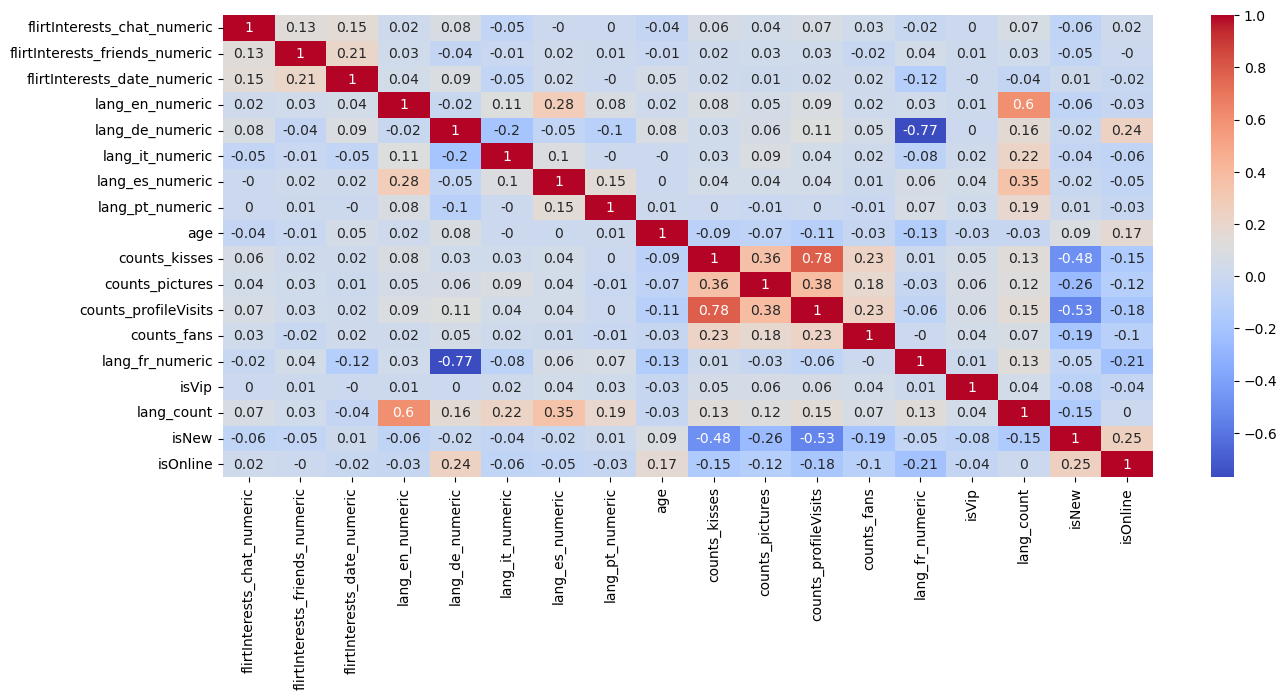

In [148]:
my_list = ['flirtInterests_chat_numeric','flirtInterests_friends_numeric','flirtInterests_date_numeric','lang_en_numeric','lang_de_numeric','lang_it_numeric','lang_es_numeric','lang_pt_numeric','age','counts_kisses','counts_pictures','counts_profileVisits','counts_fans','lang_fr_numeric','isVip','lang_count','isNew','isOnline']
plt.figure(figsize=(15,6))
correlation_matrix = df_lovoo[my_list].corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

### Analysis by location
### We used ChatGPT to add columns displaying the full name of the country and columns with latitude and longitude coordinates in,order to better show where the users of the application are from.

In [166]:
full_name_country = {
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BR': 'Brazil',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'ES': 'Spain',
    'ET': 'Ethiopia',
    'FR': 'France',
    'GB': 'United Kingdom (UK)',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IN': 'India',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'LI': 'Liechtenstein',
    'LR': 'Liberia',
    'LU': 'Luxembourg',
    'NL': 'Netherlands',
    'PE': 'Peru',
    'PH': 'Philippines',
    'RO': 'Romania',
    'RU': 'Russia',
    'SC': 'Seychelles',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'US': 'United States'}
df_lovoo['full_name_country'] = df_lovoo['country'].apply(lambda x: full_name_country.get(x, 'Unknown'))

In [162]:
lat_lon_dict = {
    'CH': {'latitude': 46.8182, 'longitude': 8.2275},
    'CA': {'latitude': 56.1304, 'longitude': -106.3468},
    'DE': {'latitude': 51.1657, 'longitude': 10.4515},
    'FR': {'latitude': 46.6034, 'longitude': 1.8883},
    'US': {'latitude': 37.0902, 'longitude': -95.7129},
    'AT': {'latitude': 47.5162, 'longitude': 14.5501},
    'CZ': {'latitude': 49.8175, 'longitude': 15.4730},
    'JM': {'latitude': 18.1096, 'longitude': -77.2975},
    'SC': {'latitude': -4.6796, 'longitude': 55.4920},
    'LR': {'latitude': 6.4281, 'longitude': -9.4295},
    'BA': {'latitude': 43.9159, 'longitude': 17.6791},
    'IT': {'latitude': 41.8719, 'longitude': 12.5674},
    'LI': {'latitude': 47.1660, 'longitude': 9.5554},
    'ES': {'latitude': 40.4637, 'longitude': -3.7492},
    'NL': {'latitude': 52.1326, 'longitude': 5.2913},
    'LU': {'latitude': 49.8153, 'longitude': 6.1296},
    'AU': {'latitude': -25.2744, 'longitude': 133.7751},
    'BR': {'latitude': -14.2350, 'longitude': -51.9253},
    'RU': {'latitude': 61.5240, 'longitude': 105.3188},
    'ID': {'latitude': -0.7893, 'longitude': 113.9213},
    'GB': {'latitude': 55.3781, 'longitude': -3.4360},
    'BE': {'latitude': 50.8503, 'longitude': 4.3517},
    'ET': {'latitude': 9.1450, 'longitude': 40.4897},
    'HU': {'latitude': 47.1625, 'longitude': 19.5033},
    'AR': {'latitude': -38.4161, 'longitude': -63.6167},
    'UA': {'latitude': 48.3794, 'longitude': 31.1656},
    'IN': {'latitude': 20.5937, 'longitude': 78.9629},
    'PH': {'latitude': 12.8797, 'longitude': 121.7740},
    'CF': {'latitude': 6.6111, 'longitude': 20.9394},
    'RO': {'latitude': 45.9432, 'longitude': 24.9668},
    'TR': {'latitude': 38.9637, 'longitude': 35.2433},
    'PE': {'latitude': -9.1900, 'longitude': -75.0152}}
df_lovoo['latitude'] = df_lovoo['country'].map(lambda x: lat_lon_dict.get(x, {}).get('latitude', None))
df_lovoo['longitude'] = df_lovoo['country'].map(lambda x: lat_lon_dict.get(x, {}).get('longitude', None))

In [288]:
import folium
# Add latitude and longitude columns to the dataframe
df_lovoo['latitude'] = df_lovoo['country'].map(lambda x: lat_lon_dict.get(x, {}).get('latitude', None))
df_lovoo['longitude'] = df_lovoo['country'].map(lambda x: lat_lon_dict.get(x, {}).get('longitude', None))

# Create a map centered at an approximate center of the data
map_center = [20, 0]
m = folium.Map(location=map_center, zoom_start=2)

# Add markers for each coordinate
for _, row in df_lovoo.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    if pd.notnull(lat) and pd.notnull(lon):
        folium.Marker([lat, lon]).add_to(m)
# Display the map
#m

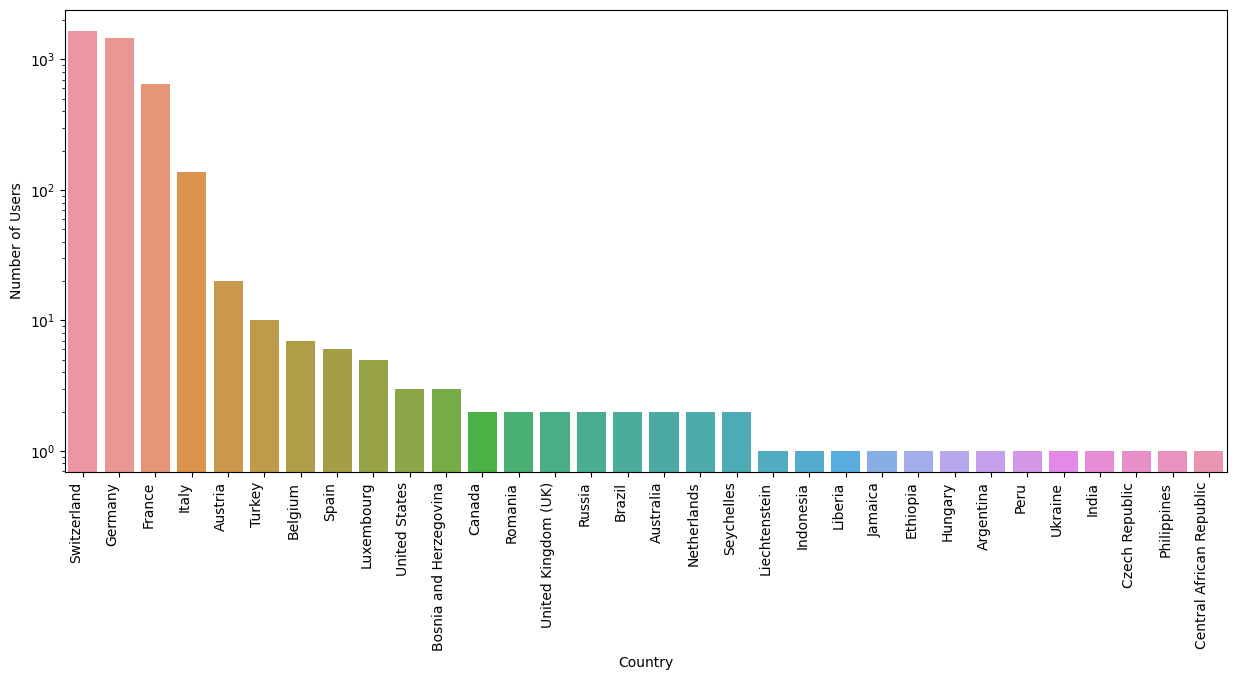

In [202]:
plt.figure(figsize=(15,6))
order = df_lovoo['full_name_country'].value_counts().index
ax= sns.countplot(data=df_lovoo, x='full_name_country', order=order)
ax.set_yscale('log')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.show()

From the graph, it is evident that the most popular countries on the app are Switzerland, Germany, France, Italy, and Austria, all located in Europe.

C:\Users\USER\AppData\Local\Temp\ipykernel_21552\3239472932.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



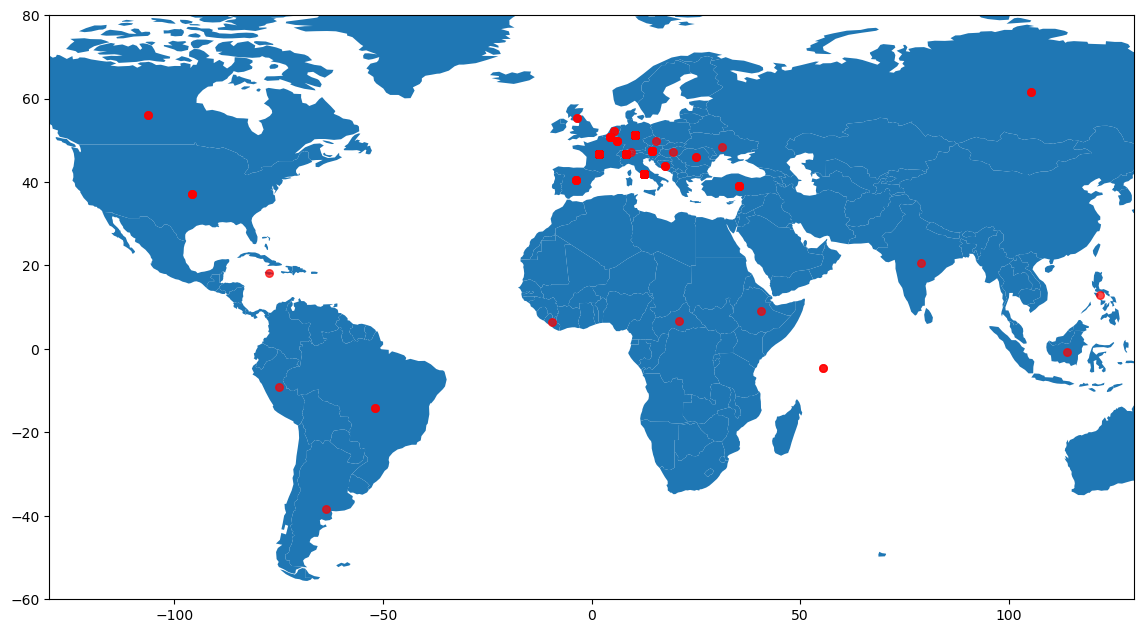

In [151]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.GeoDataFrame(df_lovoo, geometry=gpd.points_from_xy(df_lovoo.longitude, df_lovoo.latitude))
fig, ax = plt.subplots(figsize=(14, 12))
world.plot(ax=ax)
gdf.plot(ax=ax, markersize=30,marker='o', color='red', alpha=0.7)
ax.set_xlim([-130, 130])
ax.set_ylim([-60, 80])
plt.show()

<a id='section3'> </a>
# $\text{Conclusion 1}$



### We defined countries with more than 10 users on the app as "popular" countries, and countries with fewer than 10 users on the app as "unpopular" countries.

In [220]:
division_of_states = df_lovoo['full_name_country'].value_counts()
Unpopular_countries = df_lovoo[df_lovoo['full_name_country'].isin(division_of_states[division_of_states <= 10].index)].copy()
Popular_Countries = df_lovoo[df_lovoo['full_name_country'].isin(division_of_states[division_of_states > 10].index)].copy()

In [253]:
df_lovoo[['name','full_name_country', 'city','location']].head()

,name,full_name_country,city,location
0,daeni,Switzerland,Rothenburg,Rümlang
1,italiana 92,Switzerland,Sissach,Sissach
2,Lauraaa,Switzerland,Bâle,Bâle
3,Qqkwmdowlo,Canada,Montréal,Berne
4,schaessie {3,Germany,Rastatt,Rastatt


### We used the ChatGPT to build a dictionary that maps the user's current location to the country they are in.

In [256]:
location_country_mapping = {
    'Bassens': 'France',
    'Liège': 'Belgium',
    'Charleroi': 'Belgium',
    'Zürich': 'Switzerland',
    'Luxembourg': 'Luxembourg',
    'Kerkrade': 'Netherlands',
    'Geneva': 'Switzerland',
    'Viviers-sur-Chiers': 'France',
    'Balsthal': 'Switzerland',
    'Kall': 'Germany',
    'Waldbronn': 'Germany',
    'Basilea': 'Switzerland',
    'Le Grand-Saconnex': 'Switzerland',
    'Emmendingen': 'Germany',
    'Ascona': 'Switzerland',
    'Torino': 'Italy',
    'Évian-les-Bains': 'France',
    'Thuin': 'Belgium',
    'Oberglatt': 'Switzerland',
    'Amel': 'Belgium',
    'Antibes': 'France',
    'Dudelange': 'Luxembourg',
    'Nittel': 'Germany',
    'Mainz': 'Germany',
    'Genève': 'Switzerland',
    'Saarlouis': 'Germany',
    'Berne': 'Switzerland',
    'Lutry': 'Switzerland',
    'Cologny': 'Switzerland',
    'Ludwigsburg': 'Germany',
    'Aarau': 'Switzerland',
    'Embrach': 'Switzerland',
    'Glis': 'Switzerland',
    'Lyss': 'Switzerland',
    'Sennwald': 'Switzerland',
    'Pforzheim': 'Germany',
    'Zug': 'Switzerland',
    'Düdelingen': 'Luxembourg',
    'Froideville': 'Switzerland',
    'Untersiggenthal': 'Switzerland',
    'Olten': 'Switzerland',
    'Freiburg': 'Germany',
    'Sallanches': 'France',
    'Lyon': 'France',
    'Memmingen': 'Germany',
    'Lebach': 'Germany',
    'Collex-Bossy': 'Switzerland',
    'Chardonne': 'Switzerland',
    'Dresden': 'Germany',
    'Lausanne': 'Switzerland'}

Unpopular_countries['current_country'] = Unpopular_countries['location'].map(location_country_mapping)

users_and_locations_with_countries = Unpopular_countries[['name', 'location', 'current_country']]
# הדפסת הנתונים
users_and_locations_with_countries.head()

,name,location,current_country
3,Qqkwmdowlo,Berne,Switzerland
24,🍒SweeT_Cherry🍒,Untersiggenthal,Switzerland
102,Domini,Ludwigsburg,Germany
105,swaga_,Aarau,Switzerland
115,ShellyBee,Embrach,Switzerland


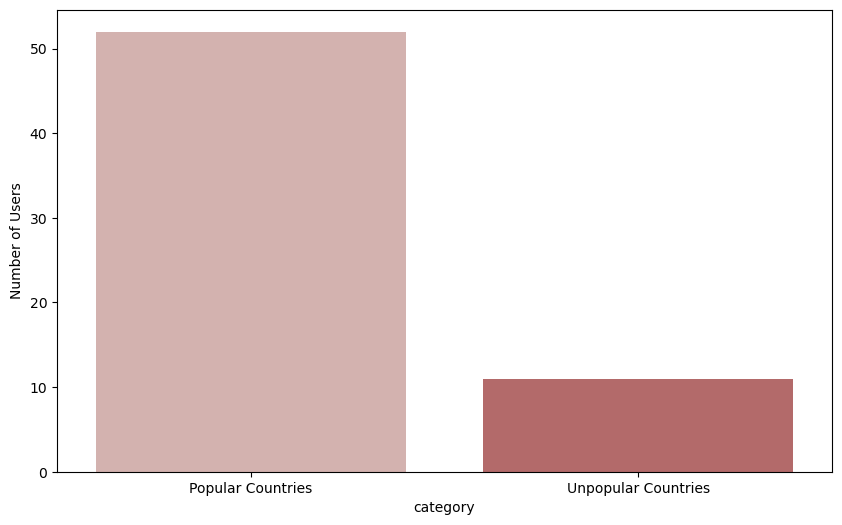

In [257]:
popular_countries_list = Popular_Countries['full_name_country'].unique()
Unpopular_countries['category'] = Unpopular_countries['current_country'].apply(lambda x: 'Popular Countries' if x in popular_countries_list else 'Unpopular Countries')
plt.figure(figsize=(10, 6))
sns.countplot(data=Unpopular_countries, x='category', palette=['#D9ADA9', '#BF5E5E'])
plt.ylabel('Number of Users')
plt.show()

The graph shows that most of the users in the less popular countries are currently in the popular countries

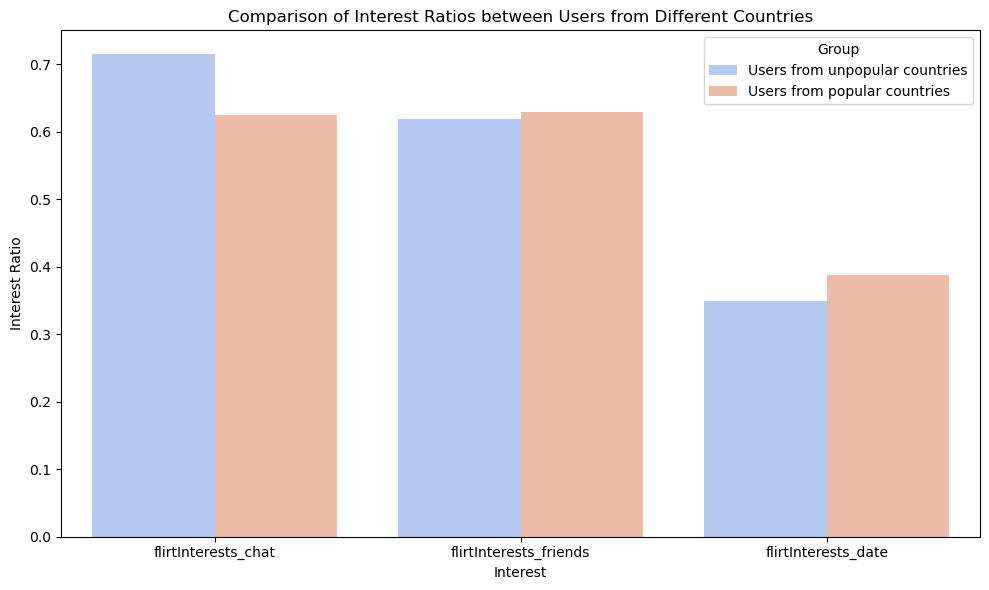

In [236]:
filtered_df_fewer = df_lovoo[df_lovoo['full_name_country'].isin(Unpopular_countries['full_name_country'].unique())]
filtered_df_more = df_lovoo[df_lovoo['full_name_country'].isin(Popular_Countries['full_name_country'].unique())]

interest_columns = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']

Unpopular = (filtered_df_fewer[interest_columns].sum() / len(filtered_df_fewer)).reset_index()
Popular = (filtered_df_more[interest_columns].sum() / len(filtered_df_more)).reset_index()

Unpopular.columns = ['Interest', 'Ratio']
Unpopular['Group'] = 'Users from unpopular countries'
Popular.columns = ['Interest', 'Ratio']
Popular['Group'] = 'Users from popular countries'

comparison_df = pd.concat([Unpopular, Popular])

plt.figure(figsize=(10, 6))
sns.barplot(x='Interest', y='Ratio', hue='Group', data=comparison_df, palette='coolwarm')
plt.title('Comparison of Interest Ratios between Users from Different Countries')
plt.ylabel('Interest Ratio')
plt.tight_layout()
plt.show()

From the graph it can be seen that users from the unpopular countries are more inclined to chat, while users from popular countries show more interest in dating.
The analysis in the previous graph showing that most of the users from the unpopular countries are now in the popular countries helps to conclude that their interest in the discourse stems from their desire to create social connections and feel less alone in a new environment. Users in new countries may seek initial social interactions of discourse as a first step in adapting to a new environment. In addition, users from the unpopular countries may open a dating app that is popular in other regions to learn and practice the language in countries where the app is popular and thus show more chat interest.


מהגרף נראה שמשתמשים ממדינות הלא פופלריות נוטים יותר לצ'אט, בעוד שמשתמשים ממדינות פופולריות מראים עניין רב יותר בדייט.
הניתוח בגרף הקודם המראה שרוב המשתמשים מהמדינות הלא פופולריות נמצאים כעת במדינות הפופולריות מסייע להסיק שעניינם בשיח נובע מרצונם ליצור קשרים חברתיים ולהרגיש פחות בודדים בסביבה חדשה. המשתמשים הנמצאים במדינות חדשות עשויים לחפש אינטראקציות חברתיות ראשוניות של שיח כשלב ראשון להסתגלות לסביבה חדשה. בנוסף, משתמשים מהמדינות הלא פופולריות עשויים לפתוח אפליקציית הכרויות שפופולרית באזורים אחרים כדי ללמוד ולתרגל את השפה במדינות בהן האפליקציה פופולרית ובכך להראות יותר עניין צאט.

<a id='section4'> </a>
# $\text{Conclusion 2}$

In [192]:
df_lovoo["counts_kisses"].describe()

count    3992.000000
mean      156.599699
std       377.650691
min         0.000000
25%        11.000000
50%        44.000000
75%       141.000000
max      9288.000000
Name: counts_kisses, dtype: float64

### We wanted to check which common words were written by the users whose amount of likes is above the median total likes in the free text and status columns

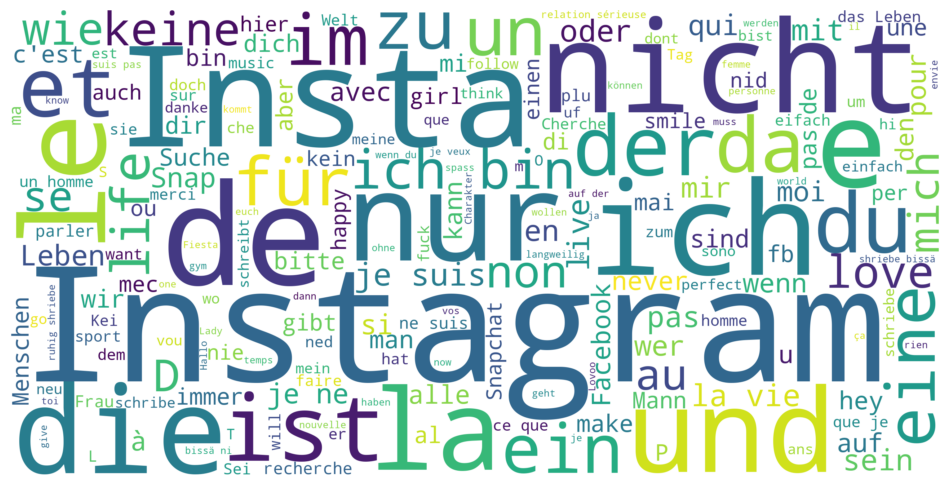

In [259]:
median_kisses = df_lovoo['counts_kisses'].median()
above_median_profiles = df_lovoo[df_lovoo['counts_kisses'] > median_kisses]
texts = above_median_profiles[['freetext', 'whazzup']].fillna('').values.flatten()
combined_text = ' '.join(texts)
wordcloud = WordCloud(width=3000, height=1500, background_color='white').generate(combined_text)
wordcloud_image = wordcloud.to_image()
plt.figure(figsize=(12, 6.5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### We used the chat to build a dictionary of common words related to food in the countries present in our dataset.


IndexError: index 2 is out of bounds for axis 0 with size 2

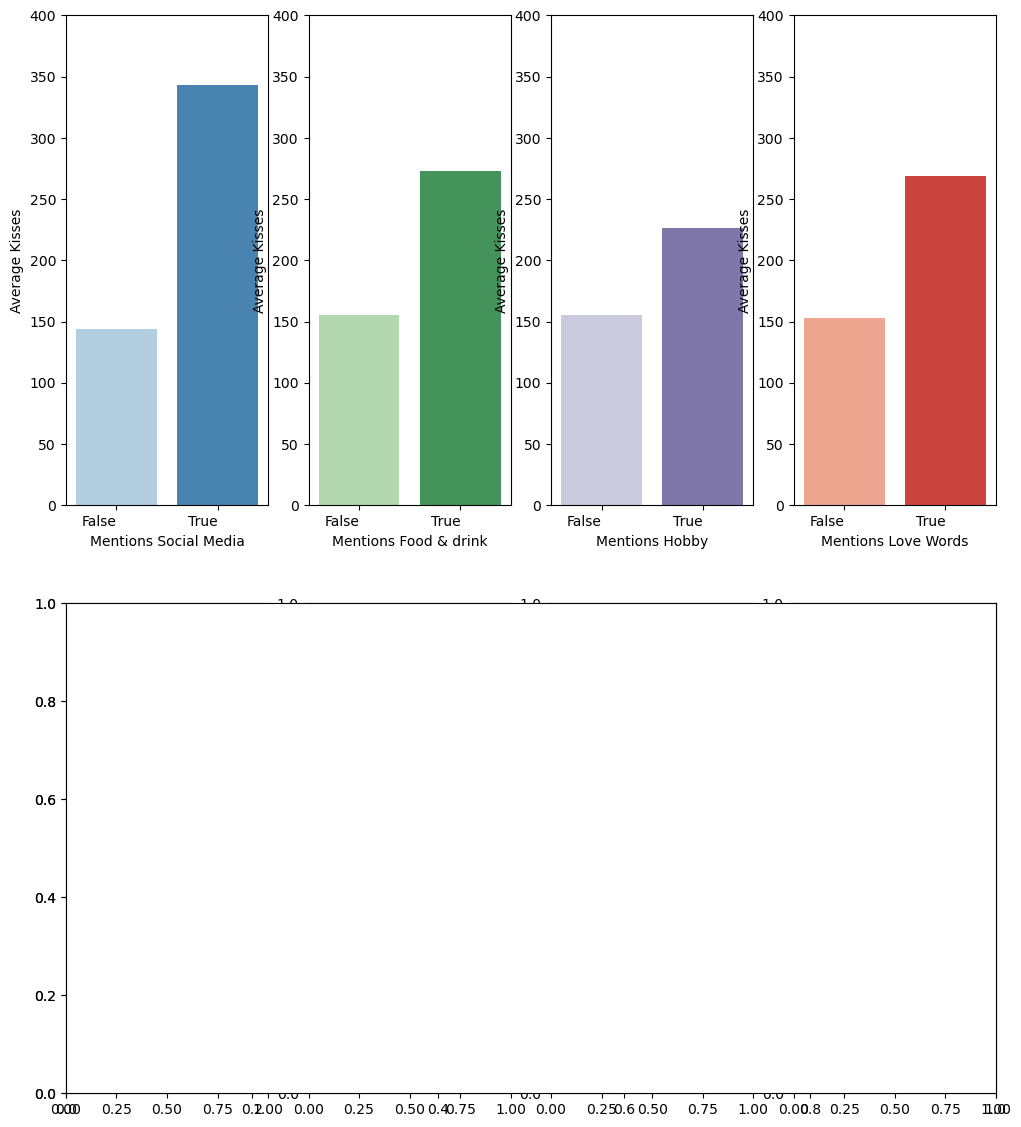

In [306]:
# Assuming df_lovoo is your DataFrame
social_media_key = ['instagram', 'insta', 'facebook', 'snapchat', 'snap']
df_lovoo['mentions_social_media'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(word in ' '.join(x.dropna().astype(str)).lower() for word in social_media_key), axis=1)
social_media_kisses = df_lovoo.groupby('mentions_social_media')['counts_kisses'].mean().reset_index()
social_media_kisses.columns = ['Mentions Social Media', 'Average Kisses']

mentioned_emojis = ['🍸', '🍹', '🍻', '🍺', '🍭', '🍒', '🍧', '🍓', '🍇', '🍷', '🍉', '🍣']
food_keywords = ['food', 'essen', 'champagne', 'bier', 'manger', 'eat', 'Bière', 'Cerveza', 'Birra', 'comida', 'cibo', 'alimentos', 'aliment', '食品', 'еда', '식품', 'makanan', 'alimentación', 'غذاء']
all_food_keywords_and_emojis = food_keywords + mentioned_emojis
df_lovoo['mentions_food&drink'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(keyword.lower() in ' '.join(x.dropna().astype(str)).lower() for keyword in all_food_keywords_and_emojis), axis=1)
food_kisses = df_lovoo.groupby('mentions_food&drink')['counts_kisses'].mean().reset_index()
food_kisses.columns = ['Mentions Food & drink', 'Average Kisses']

mentioned_emojis1 = ['⚽', '🎧', '🎼', '🎿', '🏄', '🎤', '🏂', '🏀', '🏊', '👟', '🏇']
hobby_keywords = ['sport', 'Musique', 'Musik', 'Music', 'Musicamusique', 'Hiphop', 'Party', 'Festa', 'Sportivefitness', 'Sportlich', 'Militante des animaux', 'Tierschützerin', 'Animal activist', 'Attivista per gli animali', 'Fiesta', 'Foot', 'Fußball', 'Soccer/Football', 'Calcio', 'Jeux vidéo', 'Videospiele', 'Video games', 'Videogiochi', 'Gymnase', 'Fitnessstudio', 'Gym', 'Palestra', 'Fitness']
all_hobby_keywords_and_emojis = hobby_keywords + mentioned_emojis1
df_lovoo['mentions_hobby'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(keyword.lower() in ' '.join(x.dropna().astype(str)).lower() for keyword in all_hobby_keywords_and_emojis), axis=1)
hobby_kisses = df_lovoo.groupby('mentions_hobby')['counts_kisses'].mean().reset_index()
hobby_kisses.columns = ['Mentions Hobby', 'Average Kisses']

love_words_list = ["Love", "Liebe", "Amour", "Amore", "Relation", "Beziehung", "Heart", "Herz", "Cœur", "Cuore", "Couple", "Paar"]
df_lovoo['mentions_love_words'] = df_lovoo[['freetext', 'whazzup']].apply(lambda x: any(keyword.lower() in ' '.join(x.dropna().astype(str)).lower() for keyword in love_words_list), axis=1)
love_words = df_lovoo.groupby('mentions_love_words')['counts_kisses'].mean().reset_index()
love_words.columns = ['Mentions Love Words', 'Average Kisses']

# Create plot with Seaborn
fig, axes = plt.subplots(2, 4, figsize=(12, 14))

# Initial comparison plots
sns.barplot(data=social_media_kisses, x='Mentions Social Media', y='Average Kisses', palette='Blues', ax=axes[0, 0])
sns.barplot(data=food_kisses, x='Mentions Food & drink', y='Average Kisses', palette='Greens', ax=axes[0, 1])
sns.barplot(data=hobby_kisses, x='Mentions Hobby', y='Average Kisses', palette='Purples', ax=axes[0, 2])
sns.barplot(data=love_words, x='Mentions Love Words', y='Average Kisses', palette='Reds', ax=axes[0, 3])

# Adjusting labels and limits for each subplot individually
axes[0, 0].set_ylim(0, 400)
axes[0, 1].set_ylim(0, 400)
axes[0, 2].set_ylim(0, 400)
axes[0, 3].set_ylim(0, 400)

axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), ha='right')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), ha='right')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), ha='right')
axes[0, 3].set_xticklabels(axes[0, 3].get_xticklabels(), ha='right')


# Comparison plot
x = ['Mentions Food & drink', 'Mentions Social Media', 'Mentions Hobby', 'Mentions Love Words']
y = [food_kisses.loc[food_kisses['Mentions Food & drink'] == True, 'Average Kisses'].values[0] if not food_kisses.loc[food_kisses['Mentions Food & drink'] == True, 'Average Kisses'].empty else 0,
    social_media_kisses.loc[social_media_kisses['Mentions Social Media'] == True, 'Average Kisses'].values[0] if not social_media_kisses.loc[social_media_kisses['Mentions Social Media'] == True, 'Average Kisses'].empty else 0,
    hobby_kisses.loc[hobby_kisses['Mentions Hobby'] == True, 'Average Kisses'].values[0] if not hobby_kisses.loc[hobby_kisses['Mentions Hobby'] == True, 'Average Kisses'].empty else 0,
    love_words.loc[love_words['Mentions Love Words'] == True, 'Average Kisses'].values[0] if not love_words.loc[love_words['Mentions Love Words'] == True, 'Average Kisses'].empty else 0]

comparison_data = pd.DataFrame({'Category': x, 'Average Kisses': y})
big_ax = fig.add_subplot(2, 1, 2)
sns.barplot(data=comparison_data, x='Category', y='Average Kisses', palette=['#41ab5d', '#2c7fb8', '#e6550d', '#e6550d'], ax=axes[2, 0])
big_ax.set_ylim(0, 500)
# Adjust the last plot to span both columns if desired

#axes[2, 0].set_ylim(0, 400)
#axes[2, ].set_xticklabels(axes[2, 0].get_xticklabels(), ha='right')

# Adjust layout
plt.tight_layout(pad=4.0)
plt.show()

<a id='section5'> </a>
# $\text{Conclusion 2}$

In [ ]:
vip_counts = df['isVip'].value_counts()
vip_counts.index = ['Non-VIP', 'VIP']  # Rename the indices for the legend
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
plt.title("Percentage of Regular Users vs. VIP Users", fontsize=15)
plotpie = vip_counts.plot.pie(autopct='%1.2f%%', colors=['lightblue','royalblue'], fontsize=15, explode=(0.01, 0.1), shadow=True, legend=False)
plt.legend(labels=vip_counts.index, fontsize=14)
plt.ylabel("")

plt.show()

From the pie chart, it can be seen that the majority of users do not purchase VIP status in the app.

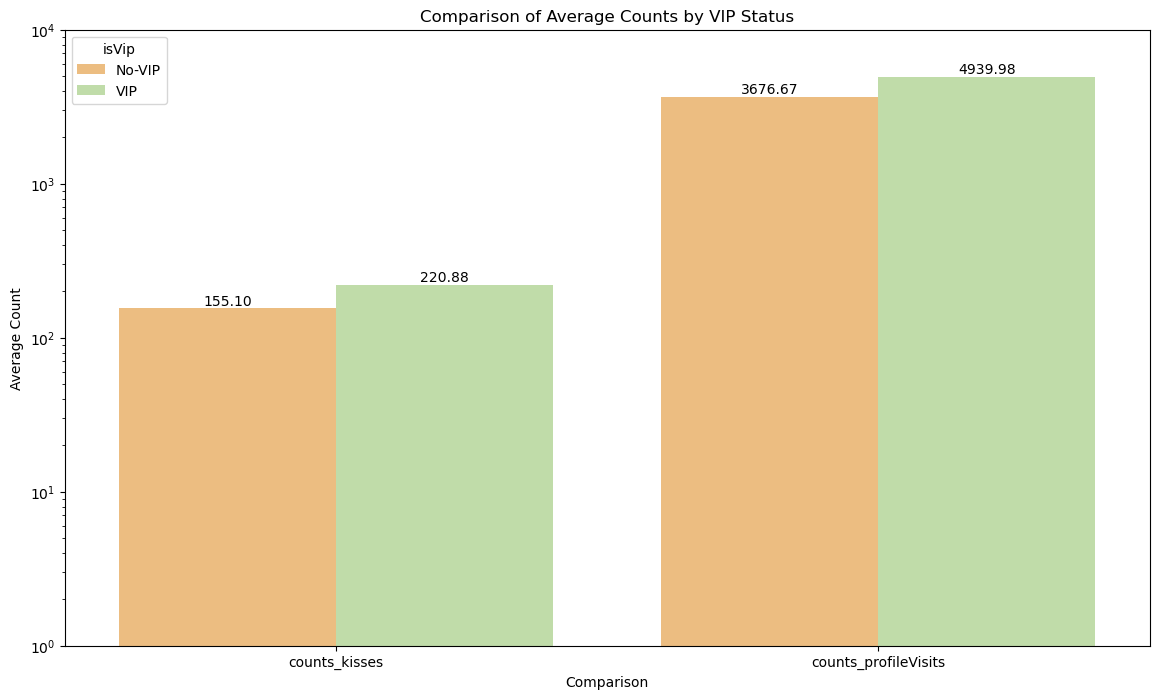

In [154]:
df_lovoo_melted = pd.melt(df_lovoo, id_vars=['isVip'], value_vars=['counts_kisses', 'counts_profileVisits'],var_name='Comparison', value_name='Count')
df_lovoo_melted['isVip'] = df_lovoo_melted['isVip'].map({1: 'VIP', 0: 'No-VIP'})

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_lovoo_melted, x='Comparison', y='Count', hue='isVip', estimator=np.mean,errorbar=None, palette='Spectral')
plt.ylabel('Average Count')
plt.title('Comparison of Average Counts by VIP Status')
plt.yscale('log')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height,f'{height:.2f}', ha='center', va='bottom')
ax.set_yticks([1, 10, 100, 1000, 10000])
plt.show()

From the graph, it can be observed that the average number of likes and profile visits is higher for VIP users compared to non-VIP users, but not by much.

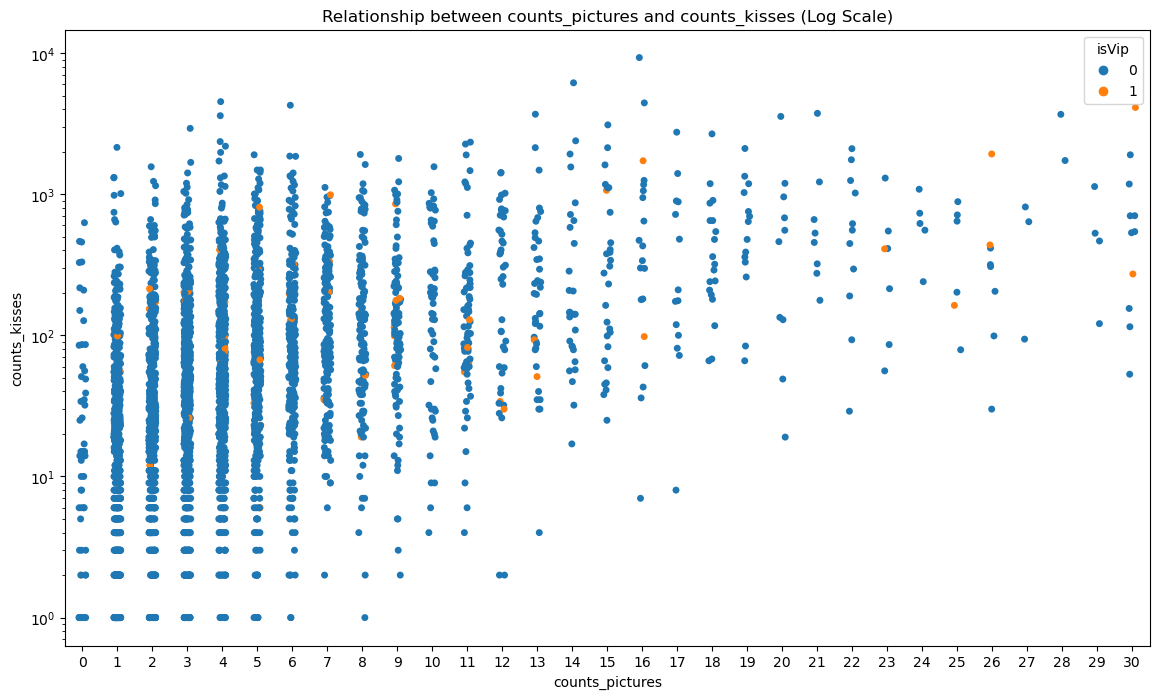

In [276]:
# יצירת גרף stripplot
plt.figure(figsize=(14, 8))
sns.stripplot(x="counts_pictures", y="counts_kisses",hue="isVip", data=df)
plt.yscale('log')
plt.xlabel('counts_pictures')
plt.ylabel('counts_kisses')
plt.title('Relationship between counts_pictures and counts_kisses (Log Scale)')
plt.show()

The graph shows that there is a general trend that as the number of photos increases, the number of likes also tends to increase. This trend is more noticeable in the higher number of photos where the spread of likes is more significant.
VIP users (orange) are scattered throughout the graph, indicating that VIP status does not necessarily correlate with higher likes.
Non-VIP users (blue) are more densely populated at the lower photo count, but also spread out over higher counts, showing that having more photos can lead to higher likes regardless of VIP status.


הגרף מראה שישנה מגמה כללית שככל שמספר התמונות עולה, גם מספר הלייקים נוטה לעלות. מגמה זו בולטת יותר במספר התמונות הגבוה יותר בהן התפשטות הלייקים משמעותית יותר.
משתמשי VIP (כתומים) מפוזרים לאורך הגרף, מה שמצביע על כך שסטטוס VIP אינו מתאם בהכרח ללייקים גבוהים יותר.
משתמשים שאינם VIP (כחול) מאוכלסים בצפיפות רבה יותר בספירת התמונות הנמוכה יותר, אך גם מפוזרים על פני ספירות גבוהות יותר, מה שמראה כי קיום יותר תמונות יכול להוביל ללייקים גבוהים יותר ללא קשר לסטטוס VIP.

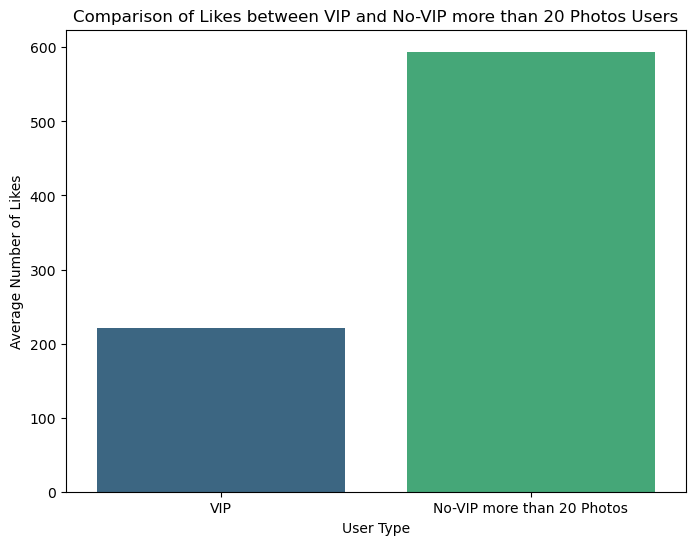

In [280]:
vip_ = df_lovoo[(df_lovoo['isVip'] == True)]
non_vip_more_than_20 = df_lovoo[(df['isVip'] == False) & (df_lovoo['counts_pictures'] > 11)]
filtered_df = pd.concat([vip_, non_vip_more_than_20])
filtered_df['User Type'] = filtered_df['isVip'].apply(lambda x: 'VIP' if x else 'No-VIP more than 20 Photos')
plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, y='counts_kisses', x='User Type', estimator=np.mean,errorbar=None,palette ='viridis')
plt.ylabel('Average Number of Likes')
plt.title('Comparison of Likes between VIP and No-VIP more than 20 Photos Users')
plt.show()


The graph shows a comparison of the average number of likes between VIP users and non-VIP users who have more than 20 photos.

Non-VIP users with more than 20 photos get more likes on average compared to VIP users.
This suggests that a higher number of photos may be a more influential factor in attracting likes compared to VIP status. The substantial difference in average number of likes implies that users who upload more photos tend to receive more engagement regardless of their VIP status.

הגרף מציג השוואה של מספר הלייקים הממוצע בין משתמשי VIP למשתמשים שאינם VIP שיש להם יותר מ-20 תמונות.

משתמשים שאינם VIP עם יותר מ-20 תמונות מקבלים יותר לייקים בממוצע בהשוואה למשתמשי VIP.
זה מצביע על כך שמספר גבוה יותר של תמונות עשוי להיות גורם משפיע יותר למשיכת לייקים בהשוואה לסטטוס VIP. ההבדל המהותי במספר הלייקים הממוצע מרמז שמשתמשים שמעלים יותר תמונות נוטים לקבל יותר מעורבות ללא קשר לסטטוס ה-VIP שלהם.
